<a href="https://colab.research.google.com/github/lydia-r/Data-projects/blob/main/Social%20Buzz/social_buzz_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/lydia-r/Data-projects/refs/heads/main/Social%20Buzz/Reactions.csv')

In [ ]:
data.head()

,Unnamed: 0,content ID,reaction type,datetime,content type,category,sentiment,score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,studying,positive,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   content ID     24573 non-null  object
 2   reaction type  24573 non-null  object
 3   datetime       24573 non-null  object
 4   content type   24573 non-null  object
 5   category       24573 non-null  object
 6   sentiment      24573 non-null  object
 7   score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [ ]:
category_counts= data['category'].value_counts()
top_categories= category_counts
print("Top 5 most reacted to categories:")
print(top_categories)

Top 5 most reacted to categories:
category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: count, dtype: int64


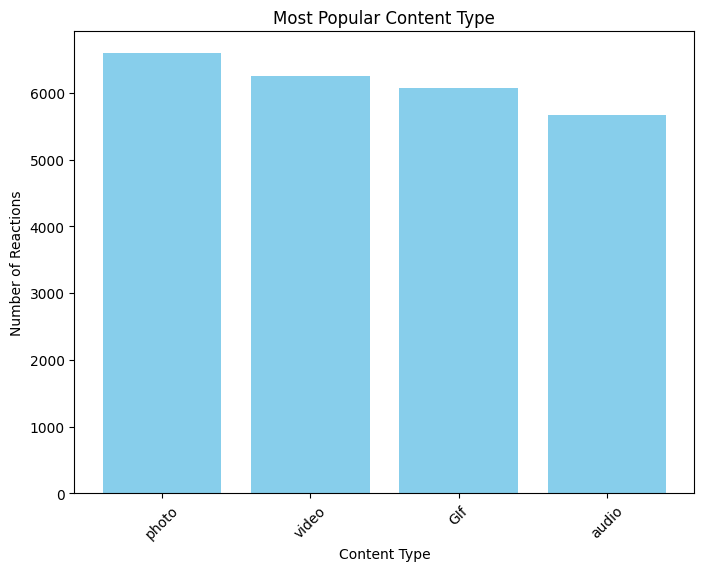

In [ ]:
content_type_counts = data['content type'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(content_type_counts.index, content_type_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Content Type')
plt.ylabel('Number of Reactions')
plt.title('Most Popular Content Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

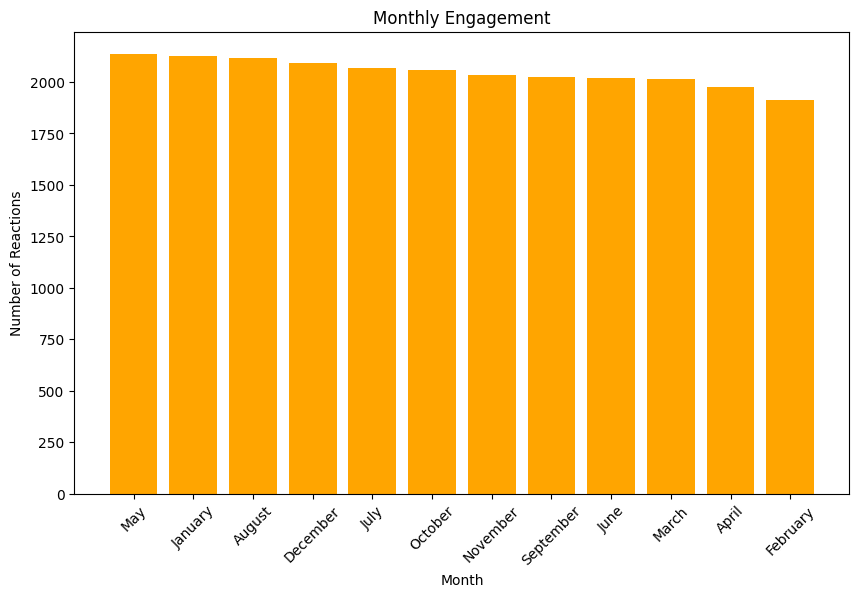

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['Month'] = data['datetime'].dt.month_name()

monthly_engagement = data['Month'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(monthly_engagement.index, monthly_engagement.values, color='orange')

plt.xlabel('Month')
plt.ylabel('Number of Reactions')
plt.title('Monthly Engagement')

plt.xticks(rotation=45)
plt.show()

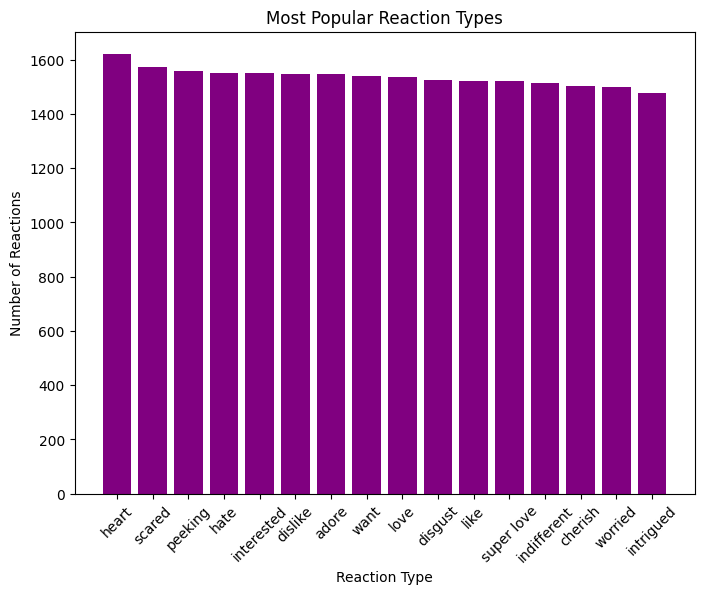

In [ ]:

reaction_type_counts = data['reaction type'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(reaction_type_counts.index, reaction_type_counts.values, color='purple')

plt.xlabel('Reaction Type')
plt.ylabel('Number of Reactions')
plt.title('Most Popular Reaction Types')
plt.xticks(rotation=45)
plt.show()

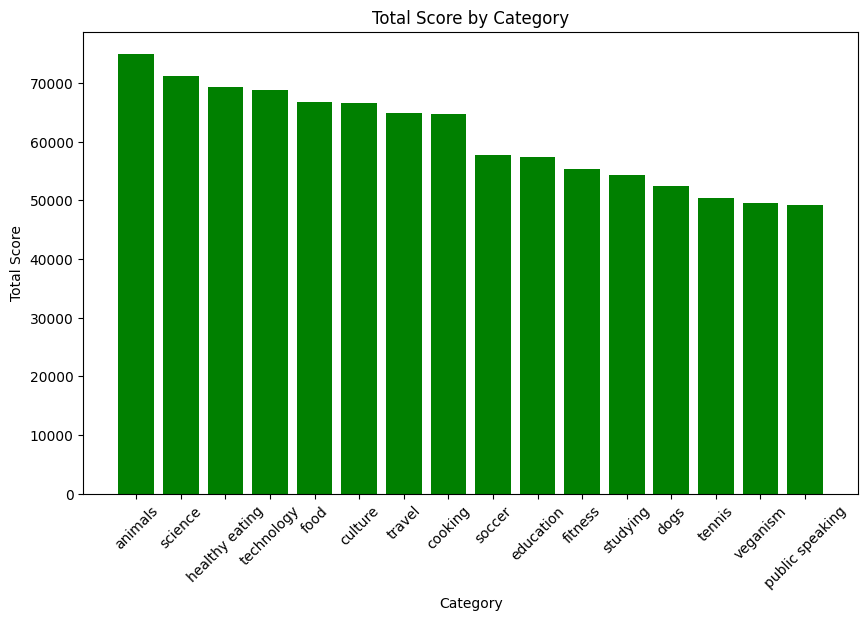

In [ ]:
category_score = data.groupby('category')['score'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(category_score.index, category_score.values, color='green')

plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Total Score by Category')

plt.xticks(rotation=45)
plt.show()